In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data=pd.read_excel('C:/Users/Asus/Downloads/Flight Fare prediction/Data_Train.xlsx')
test_data=pd.read_excel('C:/Users/Asus/Downloads/Flight Fare prediction/Data_Test.xlsx')

In [3]:
train_data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
test_data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
print('Train data with number of rows and columns->',train_data.shape)
print('Test data with number of rows and columns->',test_data.shape)

Train data with number of rows and columns-> (10683, 11)
Test data with number of rows and columns-> (2671, 10)


In [6]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [7]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

DATA WRANGLING (CATEGORICAL)

In [8]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
train_data.dropna(inplace=True)

In [11]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

DATA ANALYSIS 

In [12]:
#Extracting Day and Month
train_data['Journey_Day']=pd.to_datetime(train_data.Date_of_Journey,format='%d/%m/%Y').dt.day
train_data['Journey_Month']=pd.to_datetime(train_data.Date_of_Journey,format='%d/%m/%Y').dt.month

In [13]:
train_data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [14]:
#Dropping Date of Journey as we have converted column in integers
train_data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [15]:
#Extracting Hour and Minutes 
train_data['Dep_Hour']=pd.to_datetime(train_data['Dep_Time']).dt.hour
train_data['Dep_min']=pd.to_datetime(train_data['Dep_Time']).dt.minute

In [16]:
#Removing Depature time as we turned the respective column into integer
train_data.drop(['Dep_Time'],axis=1,inplace=True)

In [17]:
train_data.head(1)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20


In [18]:
#Extracting Arrival_Time as per Date_of_Journey
train_data['Arrival_Hour']=pd.to_datetime(train_data['Arrival_Time']).dt.hour
train_data['Arrival_Minute']=pd.to_datetime(train_data['Arrival_Time']).dt.minute

In [19]:
train_data.drop(['Arrival_Time'],axis=1,inplace=True)

In [20]:
train_data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_min,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15


In [21]:
#Assigning and converting duration column into List
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]

In [22]:
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) 

In [23]:
train_data['Duration_hours']=duration_hours
train_data['Duration_mins']=duration_mins

In [24]:
train_data.drop(['Duration'],axis=1,inplace=True)

In [25]:
train_data.head(4)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_min,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25


In [26]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

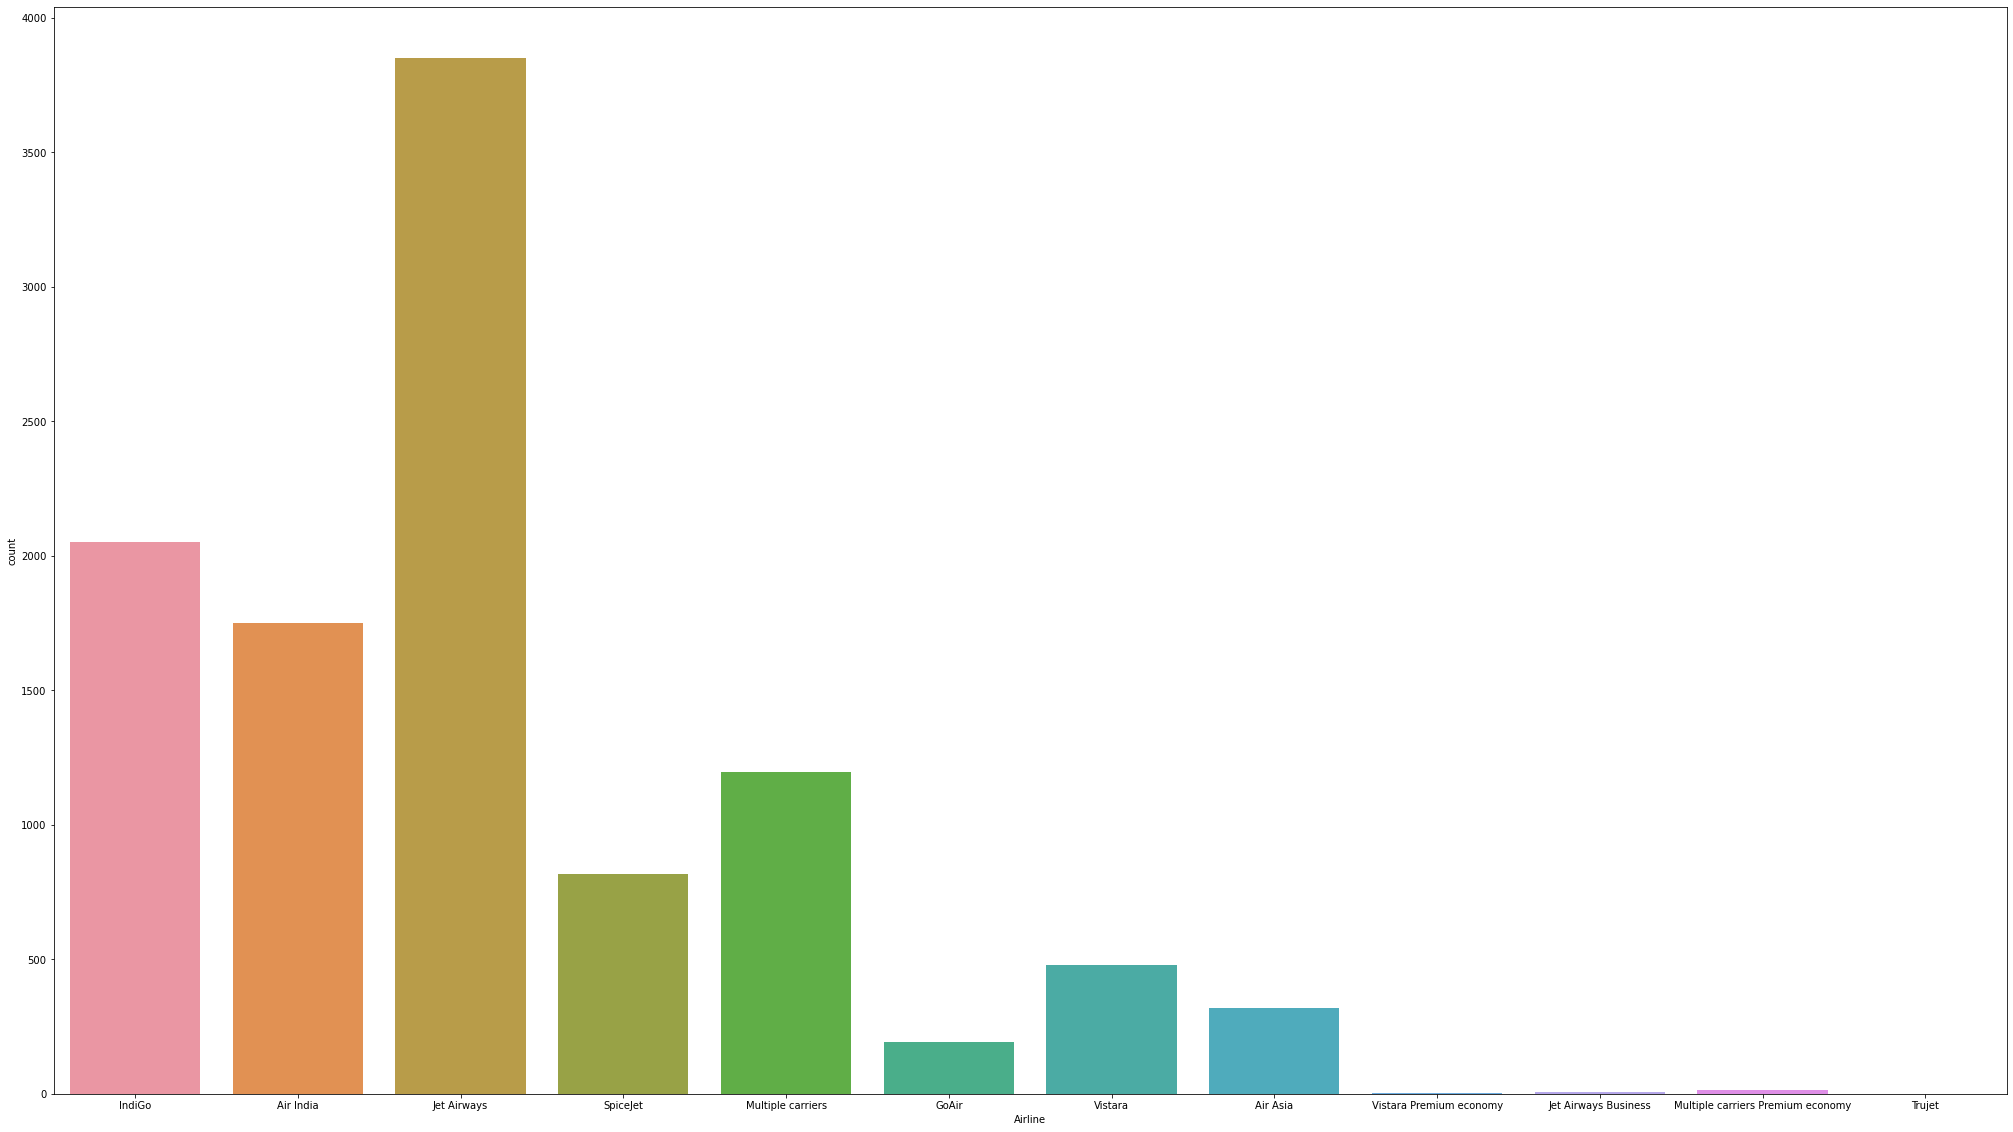

In [27]:
plt.figure(figsize=(35,20))
fig=sns.countplot(x='Airline',data=train_data)
plt.show()

<AxesSubplot:xlabel='Airline', ylabel='Price'>

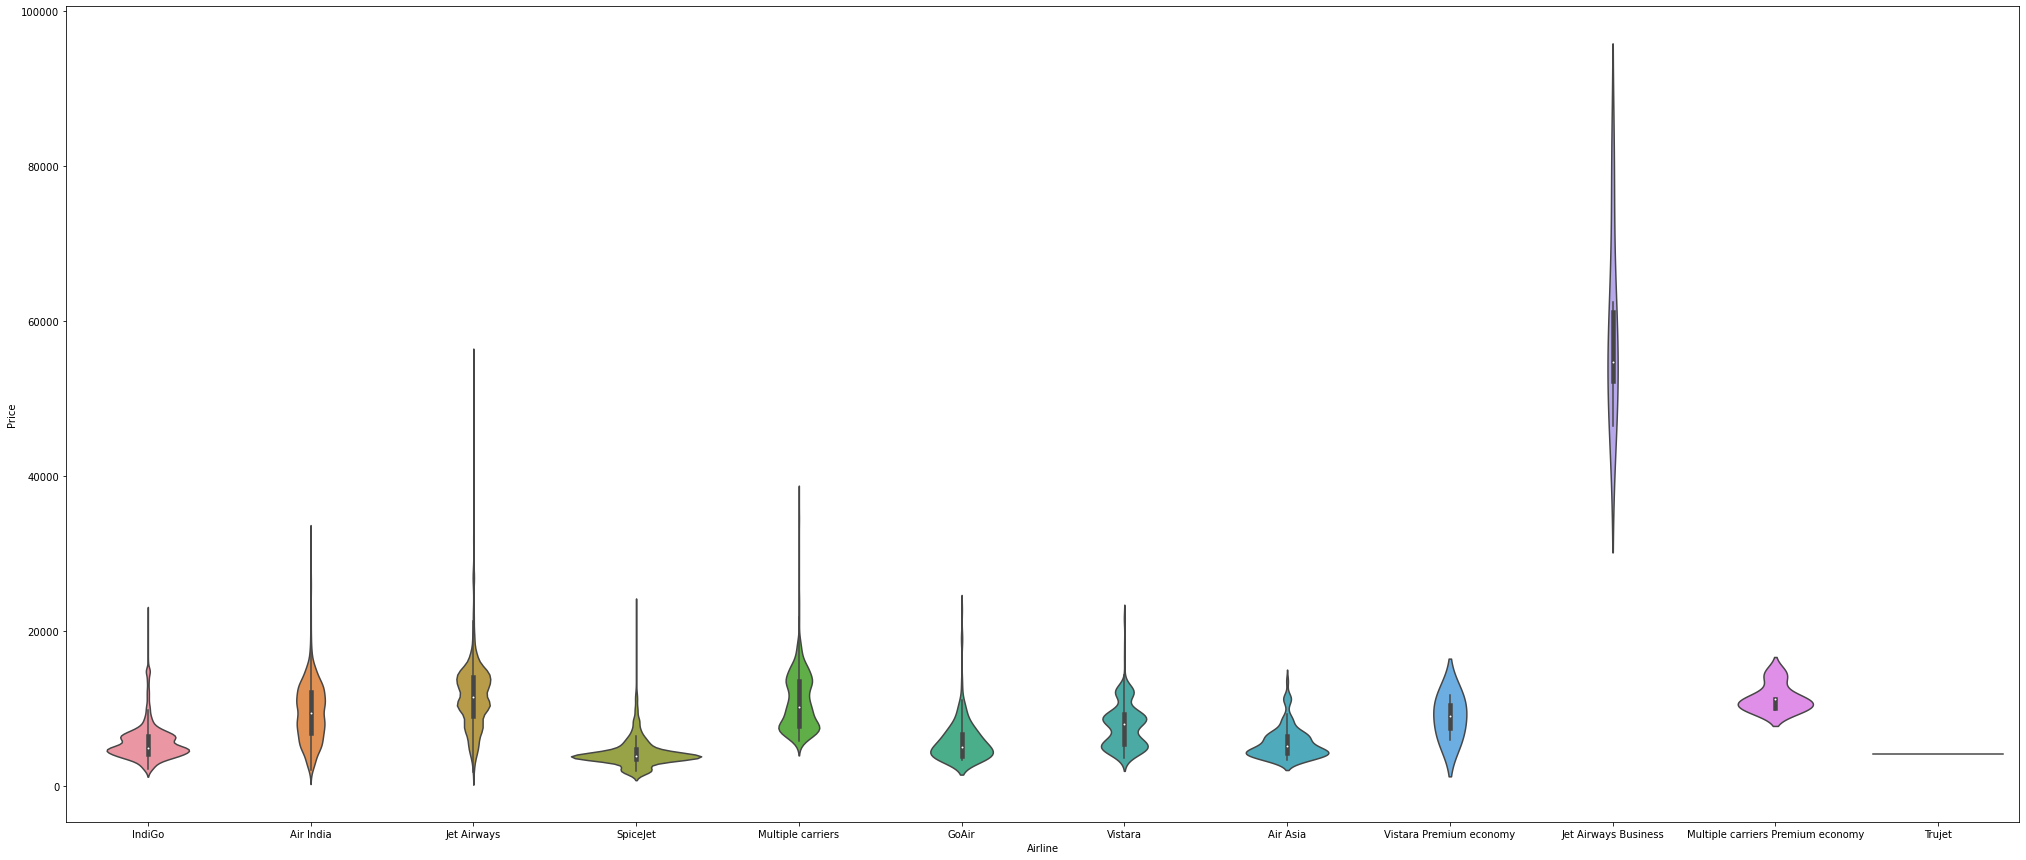

In [28]:
fig,ax=pyplot.subplots(figsize=(35,15))
sns.violinplot(ax=ax,x=train_data['Airline'],y=train_data['Price'])

In [29]:
#one hot coding for the features of Airline
Airline=train_data['Airline']
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [30]:
train_data['Source'].head()

0    Banglore
1     Kolkata
2       Delhi
3     Kolkata
4    Banglore
Name: Source, dtype: object

In [31]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [32]:
#One hot coding for the features of Source
Source=train_data['Source']
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [33]:
train_data['Route'].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
CCU → VTZ → BLR                   1
BLR → HBX → BOM → NAG → DEL       1
BLR → HBX → BOM → BHO → DEL       1
CCU → IXB → DEL → BLR             1
BOM → CCU → HYD                   1
Name: Route, Length: 128, dtype: int64

In [34]:
train_data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [35]:
train_data.corr()

,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_min,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_mins
Price,1.000000,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155,0.508778,-0.124855
Journey_Day,-0.153774,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510,-0.022059,-0.008940
Journey_Month,-0.103643,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626,0.016141,-0.040897
Dep_Hour,0.006799,0.002170,0.039127,1.000000,-0.024745,0.005180,0.067911,0.002869,-0.023707
Dep_min,-0.024458,-0.008170,-0.059267,-0.024745,1.000000,0.043122,-0.017597,-0.022104,0.092485
Arrival_Hour,0.024244,-0.003245,-0.003927,0.005180,0.043122,1.000000,-0.154363,0.055276,-0.118309
Arrival_Minute,-0.086155,-0.017510,-0.100626,0.067911,-0.017597,-0.154363,1.000000,-0.074450,0.151628
Duration_hours,0.508778,-0.022059,0.016141,0.002869,-0.022104,0.055276,-0.074450,1.000000,-0.126468
Duration_mins,-0.124855,-0.008940,-0.040897,-0.023707,0.092485,-0.118309,0.151628,-0.126468,1.000000


In [36]:
#We already have destination variables so dropping 'Route' column and dropping 'Addition_Info' column as 
#Total_stop and Route are related to each other
train_data.drop(['Additional_Info','Route'],axis=1,inplace=True)

In [37]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [38]:
train_data.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [39]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_min,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [40]:
Destination=train_data['Destination']
Destination=pd.get_dummies(train_data['Destination'],drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [41]:
train_data=pd.concat([train_data,Airline,Source,Destination],axis=1)

<AxesSubplot:xlabel='Price'>

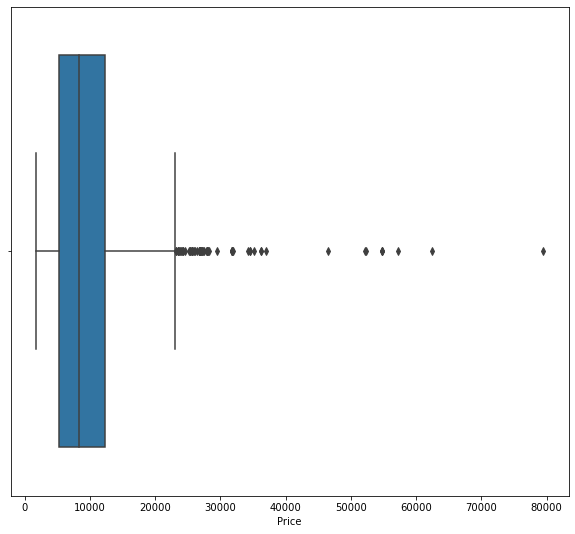

In [42]:
fig,ax=plt.subplots(figsize=(10,9))
sns.boxplot(train_data['Price'])

In [43]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_min,Arrival_Hour,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [44]:
train_data.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [45]:
train_data.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_min,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_mins,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


TEST DATA

In [46]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [47]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


In [48]:
test_data.dropna(inplace=True)

In [49]:
# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data["Date_of_Journey"], format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [50]:
#Depature Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [51]:
# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [52]:
# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i] 

In [53]:
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)

In [54]:
#Categorical Data
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64


In [55]:
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64


In [56]:
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


In [57]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [58]:
# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [59]:
# Concatenate dataframe --> test_data + Airline + Source + Destination
test_data = pd.concat([test_data, Airline, Source, Destination], axis = 1)

In [60]:
test_data.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [62]:
print('Shape of Test Data:',test_data.shape)

Shape of Test Data: (2671, 28)


In [63]:
print('Shape of Train Data:',train_data.shape)

Shape of Train Data: (10682, 30)


In [64]:
test_data.head(4)

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0


In [65]:
train_data.head(3)

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_min,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_mins,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0


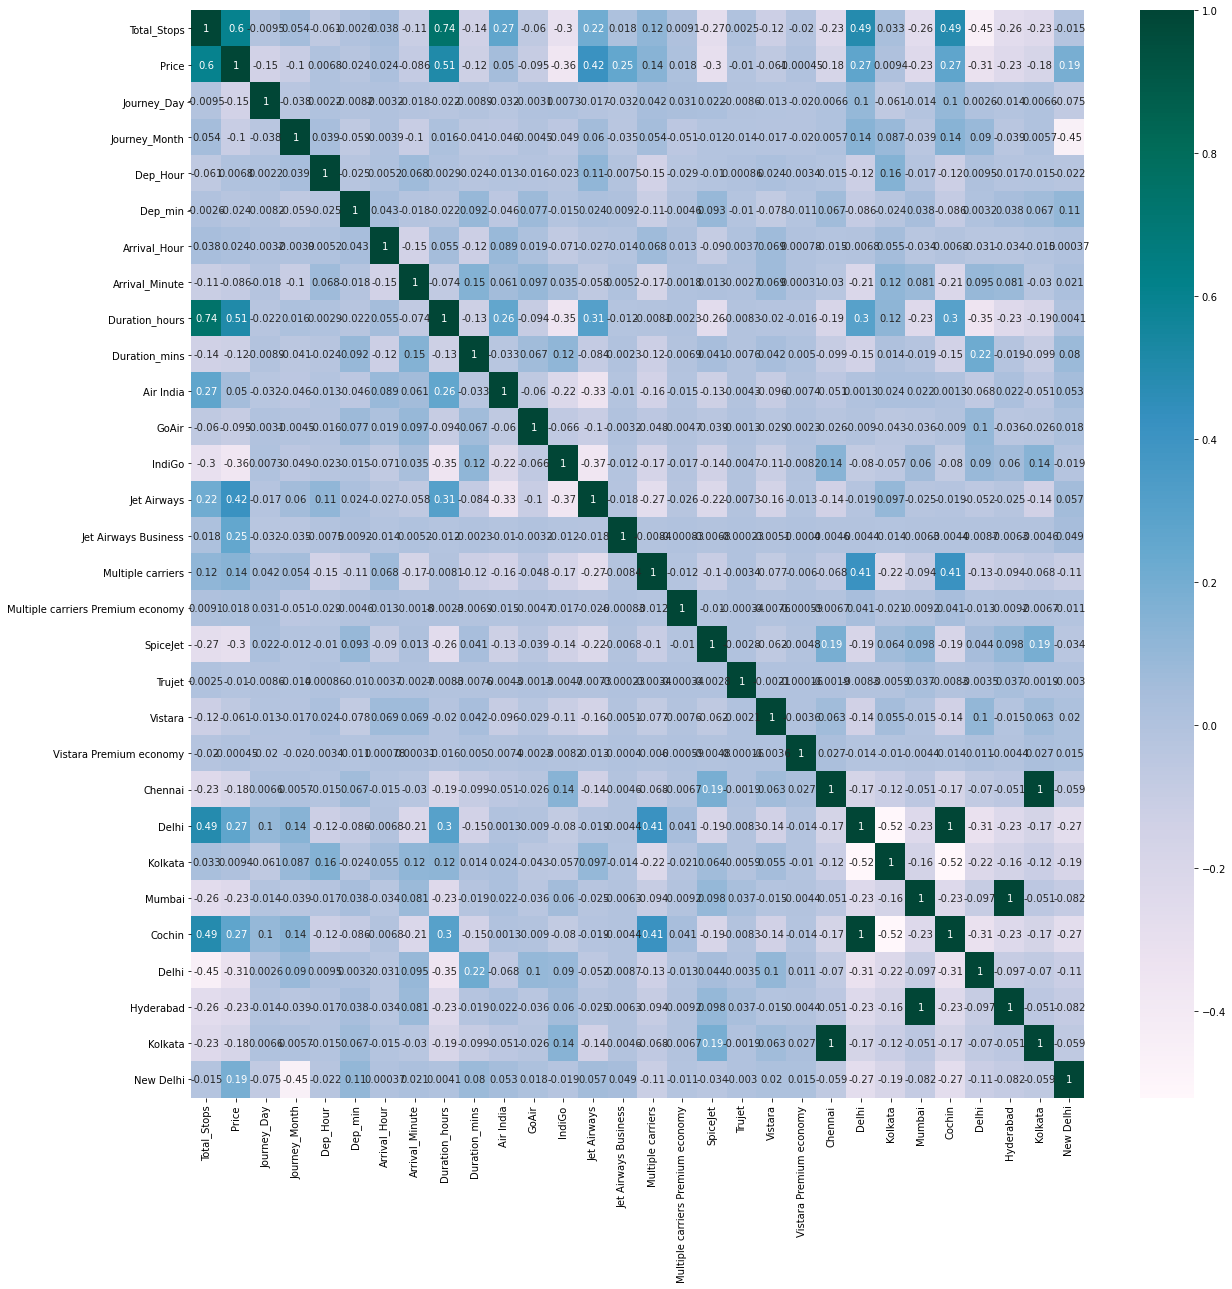

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(train_data.corr(),annot=True,cmap='PuBuGn')
plt.show()

DROPPING THE TARGET VARIABLE

In [69]:
X=train_data.drop(['Price'],axis=1)
y=train_data['Price']

In [71]:
from sklearn.ensemble import ExtraTreesRegressor

In [72]:
ETS=ExtraTreesRegressor()
ETS.fit(X,y)

ExtraTreesRegressor()

In [75]:
print(ETS.feature_importances_)

[2.14693923e-01 1.44686717e-01 5.30022498e-02 2.48087963e-02
 2.09434927e-02 2.77196293e-02 1.88470736e-02 1.27592818e-01
 1.73938879e-02 9.42606315e-03 1.97326722e-03 1.86462347e-02
 1.42753865e-01 6.79423371e-02 1.96889301e-02 7.81320478e-04
 3.32240529e-03 1.05905617e-04 4.96751177e-03 8.13678467e-05
 5.27139556e-04 7.94992004e-03 3.15762631e-03 7.00780714e-03
 1.39889181e-02 1.64163975e-02 6.16822412e-03 4.98319191e-04
 2.49078527e-02]


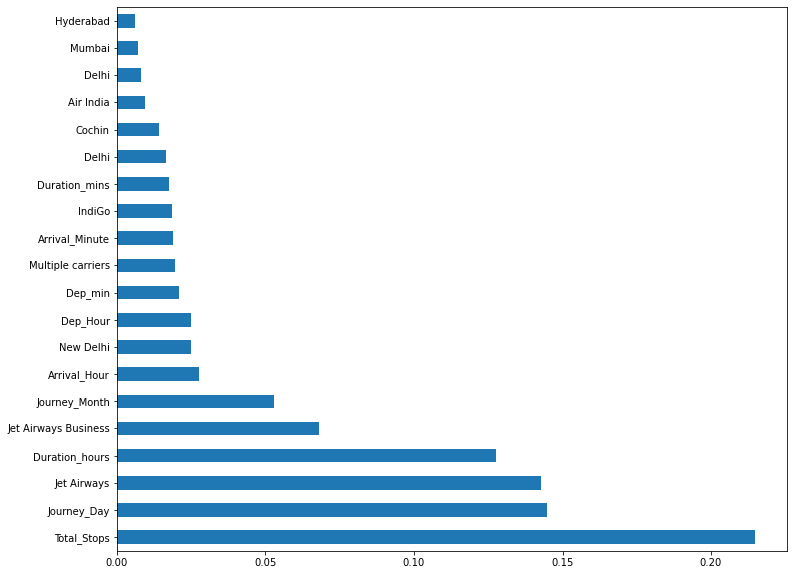

In [77]:
plt.figure(figsize=(12,10))
feature_importance=pd.Series(ETS.feature_importances_,index=X.columns)
feature_importance.nlargest(20).plot(kind='barh')
plt.show()

TRAINING AND VALIDATION

In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=420)

In [79]:
from sklearn.ensemble import RandomForestRegressor

In [80]:
rfg=RandomForestRegressor()

In [84]:
rfg.fit(X_train,y_train)

RandomForestRegressor()

In [85]:
y_prediction=rfg.predict(X_test)

In [87]:
rfg.score(X_test,y_test)

0.8233777096401351

In [88]:
from sklearn.model_selection import RandomizedSearchCV

In [89]:
n_estimators=[int(x) for x in np.linspace(100,1200,12)] #No.of trees in Random Forest
max_features=['auto','sqrt'] #No.of features to be considered on each split
max_depth=[int(x) for x in np.linspace(5,30,num=7)] #Max depth or floors of the Tree
min_samples_split=[2,5,10,15,100] #Samples required to split a node
min_samples_leaf=[1,2,5,10] #Min samples required for each leaf

In [90]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [92]:
rf_random = RandomizedSearchCV(estimator = rfg, param_distributions = random_grid,
                               scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2,
                               random_state=42, n_jobs = 1)

In [94]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   5.0s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s


[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   5.1s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   3.7s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   5.9s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   7.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=9 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=9, total=   6.8s
[CV] n_estimators=900, min_samples_split

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  8.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 9, 13, 17, 21, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [96]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 21}

In [98]:
predictions=rf_random.predict(X_test)
predictions

array([ 9387.15323714, 12970.90562759, 12321.53980115, ...,
       14978.28411   , 12032.17319428, 13591.68482242])

In [ ]:
#VISUALIZE THE TREE USING RESPECTIVE LINK(http://webgraphviz.com/)
dotfile=open('Mytree.dot','w')
rf_random.export_graphviz(rf_random,out_file=dotfile,
                     features_names=x_train.columns,
                     class_names=['0','1'],
                     proportion=True)
dotfile.close()

In [99]:
from sklearn.metrics import accuracy_score

clf = RandomForestRegressor(n_estimators = 700,
 min_samples_split = 15,
 min_samples_leaf =  1,
 max_features = 'auto',
 max_depth =  20)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8413552575258287